In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_json("Final.json")

<h1>Data Discretization</h1>

<p> 
<b> Data Discretization is used to transform data in a continuous domain to a 
finite set of values. In our case we have used the equal-width binning technique for the number of citations column. The function cut() in the pandas library is used to perform this task. Here we
have classified the number of cuts as either less, medium, high or very high. 

</b>
</p>

In [4]:
df["citations_cut"] = pd.cut(df["Number of Citations"], bins = 4, labels = ["less","medium","high","very high"])

<h3> How the number of citations are distributed</h3>

In [5]:
df['citations_cut'].value_counts()

citations_cut
less         9306
medium         19
high            5
very high       1
Name: count, dtype: int64

In [6]:
df

,Date of Judgment,case_title,author,Court Name,Jurisdiction Level,Geographical Region,Case Type,Legal Area,Core Legal Issues,Cited Precedents,...,Concurrence/Dissent Status,Relief Granted,Appeal Status,Number of Citations,Primary Statutes,Number of Primary Statutes,case_id,Number of Core Legal Issues,Case Outcome,citations_cut
0,"20 January, 2022",Shenbagam vs Kk Rathinavel,D.Y. Chandrachud,Supreme Court of India,Appellate,Delhi,Civil Appeal,General Law,"[Liability, Fraud, Inheritance]","[Dassji v. Sita, Ram v. Charanjit, Jain v. Ani...",...,Unanimous,447003.00,Appellate Decision,4,"[Section\n 16, Section 20, Article...",5,SCI_2022_1538,3,Civil Appeal,less
1,"21 January, 2022",Sunil Kumar Maity vs State Bank Of India,Bela M. Trivedi,Supreme Court of India,Appellate,Delhi,Civil Appeal,Family Law,"[Negligence, Liability]",[],...,Unanimous,674.00,Appellate Decision,0,"[Section 5, Section 21]",2,SCI_2022_1539,2,Civil Appeal,less
2,"11 January, 2022",Haryana Tourism Limited vs M/S Kandhari Bevera...,M.R. Shah,Supreme Court of India,Appellate,Delhi,Civil Appeal,General Law,[Intellectual Property],[],...,Unanimous,90.76,Appellate Decision,0,"[Section 37, Section 16, Section 34]",3,SCI_2022_1540,1,Civil Appeal,less
3,"6 January, 2022",Union Of India vs Alapan Bandyopadhyay,A.M. Khanwilkar,Supreme Court of India,Appellate,Delhi,Civil Appeal,Labour Law,[Dependency],"[Thakur v. Union, Mishra v.\nMohammad, Tiwari ...",...,Unanimous,0.00,Appellate Decision,4,"[Section\n\n 25, Section 25, Article ...",23,SCI_2022_1541,1,Civil Appeal,less
4,"11 January, 2022",Samruddhi Co Operative Housing Society ... vs ...,D.Y. Chandrachud,Supreme Court of India,Appellate,Delhi,Civil Appeal,Contract Law,"[Compensation, Liability, Breach of Contract, ...","[Waghmare v. Shree, Hole v. Chard, Siddiq v. S...",...,Unanimous,20.60,Appellate Decision,5,"[Section 22, Section 23, Section 6, Section 3,...",7,SCI_2022_1542,4,Civil Appeal,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,"29 July, 2005",Raju S/O Lakhan vs State Of U.P.,Ravindra Singh,Allahabad High Court,Appellate or Original,Allahabad,UKN,General Law,"[Dependency, Criminal Offense]",[],...,Unanimous,0.00,Original Jurisdiction,0,"[Section 376, Section 161]",2,AHC_2005_1307,2,UKN,less
9327,"12 August, 2005",Urmila Chaurasia Wife Of Harish Chandra ... vs...,A.P. Sahi,Allahabad High Court,Appellate,Allahabad,UKN,Constitutional Law,[Liability],"[Devi v. State, Kumar v. Adhyaksh, Devi v. Sta...",...,Unanimous,225.00,Appellate Decision,8,"[Article 12, Article 162, Section 11, Article ...",7,AHC_2005_1375,1,UKN,less
9328,"8 August, 2005",Kesarwani Zarda Bhandar vs Additional Labour C...,Rakesh Tiwari,Allahabad High Court,Appellate,Allahabad,UKN,Labour Law,[General Issue],[Allahabad v. The],...,Unanimous,158158.00,Original Jurisdiction,1,"[Section 33, Section 6, Section 4]",3,AHC_2005_1356,1,UKN,less
9329,"29 July, 2005",Naresh Rav Son Of Sri Lakhoram (In Jail) vs St...,Ravindra Singh,Allahabad High Court,Appellate or Original,Allahabad,UKN,General Law,[Criminal Offense],[],...,Unanimous,0.00,Original Jurisdiction,0,[],0,AHC_2005_1321,1,UKN,less


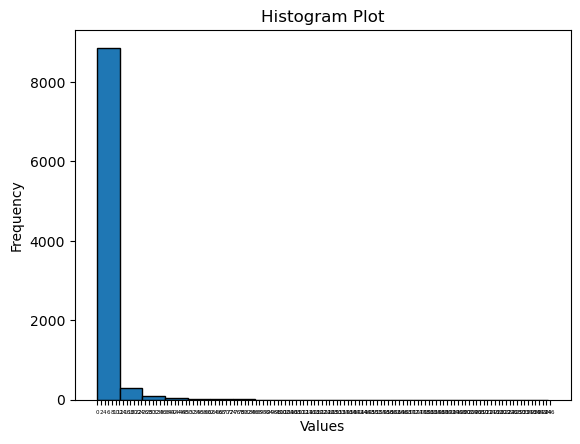

In [7]:
df["Number of Citations"].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histogram Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')


plt.xticks(range(0, df['Number of Citations'].max() + 2, 2),fontsize=4)

plt.show()


<h1> Correlation Analysis</h1>

<b>Correlation  is used to denote association between two quantitative variables. We also assume that the association is linear, that one variable increases or decreases a fixed amount for a unit increase or decrease in the other.</b>

<p> We have used the Pearson's correlation coefficient and have also plotted a heatmap in the
subsequent slides</p>

In [8]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

In [9]:
correlation_matrix

,Paragraph Count,Word Count,Average Sentence Length,Bench Composition,Relief Granted,Number of Citations,Number of Primary Statutes,Number of Core Legal Issues
Paragraph Count,1.000000,0.887075,0.141091,0.451559,0.015838,0.554858,0.761304,0.593841
Word Count,0.887075,1.000000,0.132680,0.434592,0.012008,0.688836,0.796501,0.666203
Average Sentence Length,0.141091,0.132680,1.000000,0.176841,0.013026,0.068038,0.126530,0.114448
Bench Composition,0.451559,0.434592,0.176841,1.000000,0.023153,0.344699,0.402971,0.454082
Relief Granted,0.015838,0.012008,0.013026,0.023153,1.000000,0.004972,0.007464,0.023355
Number of Citations,0.554858,0.688836,0.068038,0.344699,0.004972,1.000000,0.597323,0.521187
Number of Primary Statutes,0.761304,0.796501,0.126530,0.402971,0.007464,0.597323,1.000000,0.593875
Number of Core Legal Issues,0.593841,0.666203,0.114448,0.454082,0.023355,0.521187,0.593875,1.000000


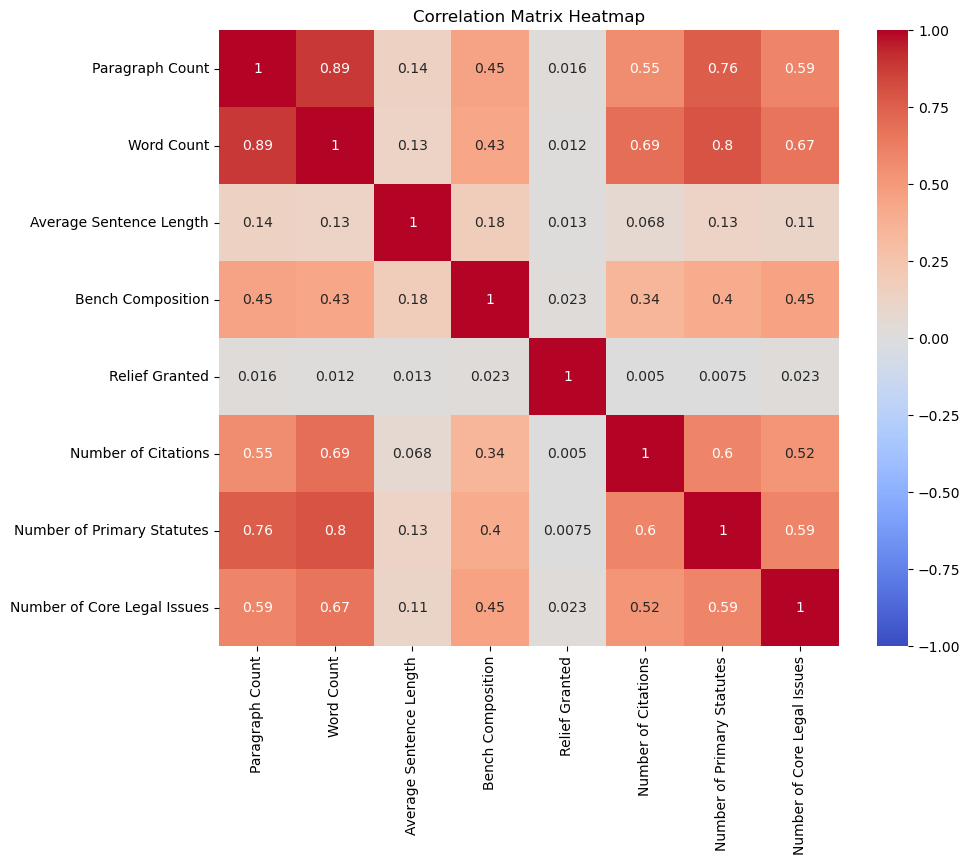

In [10]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

<h2>Inferences that can be obtained from the heatmap</h2>
<ul>
<li> Paragraph Count & Word Count (0.887): There is a high positive correlation between paragraph count and word count, suggesting that as documents have more paragraphs, they also tend to have more words. This is expected, as longer documents typically require more paragraphs</li> 

<li> A moderate correlation between primary statutes cited and total citations suggests that cases involving more primary statutes may also have more overall citations, likely indicating a more legally complex case.</li> 

<li>Paragraph count and Bench composition also do not have a very high correlation, thus implying that more the number of judges does not neccessarily mean a longer judgement.</li>

<li>Relief Granted has very low correlations with other variables, indicating that the decision to grant relief is relatively independent of document length, number of citations, or the complexity as measured by other factors like the <b>case details</b>.</li>

</ul>

<ul>
<li> Number of Core Legal Issues & Bench Composition (0.454):This moderate positive correlation may indicate that cases with a more complex bench composition (such as more judges or varied expertise on the panel) are likely to involve multiple core legal issues. This could be because a diverse bench is brought in for cases with broader implications or complex, multifaceted legal questions. </li>

<li>Number of Citations & Number of Core Legal Issues (0.521): A moderate positive correlation here suggests that as the number of core legal issues increases, so does the number of citations. This makes sense, as cases that involve multiple legal questions often require more references to past cases or statutory interpretations to address each issue thoroughly. </li>
</ul>

In [11]:
'''
Normalization of the data using Z-Score
'''

'\nNormalization of the data using Z-Score\n'

<h1> Z-Score Normalization</h1>

<h3> We use the Z-score normalization to normalize the data with a mean of 0 and standard deviation
1. This is necessary if the values of one attribute is significantly more than that of other attribute, then the attribute having smaller values will not contribute to the model building</h3>

In [12]:

numeric_df_normalized = (numeric_df - numeric_df.mean()) / numeric_df.std()


In [13]:
numeric_df_normalized

,Paragraph Count,Word Count,Average Sentence Length,Bench Composition,Relief Granted,Number of Citations,Number of Primary Statutes,Number of Core Legal Issues
0,0.903413,0.666784,0.127215,0.731578,0.022917,0.189586,0.184149,1.212551
1,0.031654,-0.106141,0.066181,0.731578,-0.016758,-0.314052,-0.210498,0.349522
2,-0.023822,-0.243283,0.226208,0.731578,-0.016810,-0.314052,-0.078949,-0.513507
3,1.384201,0.572775,1.559270,0.731578,-0.016818,0.189586,2.552029,-0.513507
4,0.478100,0.260730,0.162197,0.731578,-0.016816,0.315496,0.447246,2.075580
...,...,...,...,...,...,...,...,...
9326,-0.367242,-0.396383,-0.887281,-0.117365,-0.016818,-0.314052,-0.210498,0.349522
9327,-0.235157,0.172251,0.071391,-0.117365,-0.016798,0.693224,0.447246,-0.513507
9328,-0.293275,-0.034094,-0.280668,-0.117365,-0.002759,-0.188142,-0.078949,-0.513507
9329,-0.364600,-0.399227,-0.855276,0.731578,-0.016818,-0.314052,-0.473596,-0.513507


<h3>A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset’s distributions and correlations. The primary purpose of a pair plot is to simplify the initial stages of data analysis by offering a comprehensive snapshot of potential relationships within the data.</h3>

<h4>In our dataset, our case type are classified into three types: Criminal,Civil, Unknown. In the 
pair plotting done in the next slide, we see the relationship between each feature and cases of different types are highlighted in different colors. This allows us to derive rich and meaningful insights about the relationships between different features specific to the case type </h4>

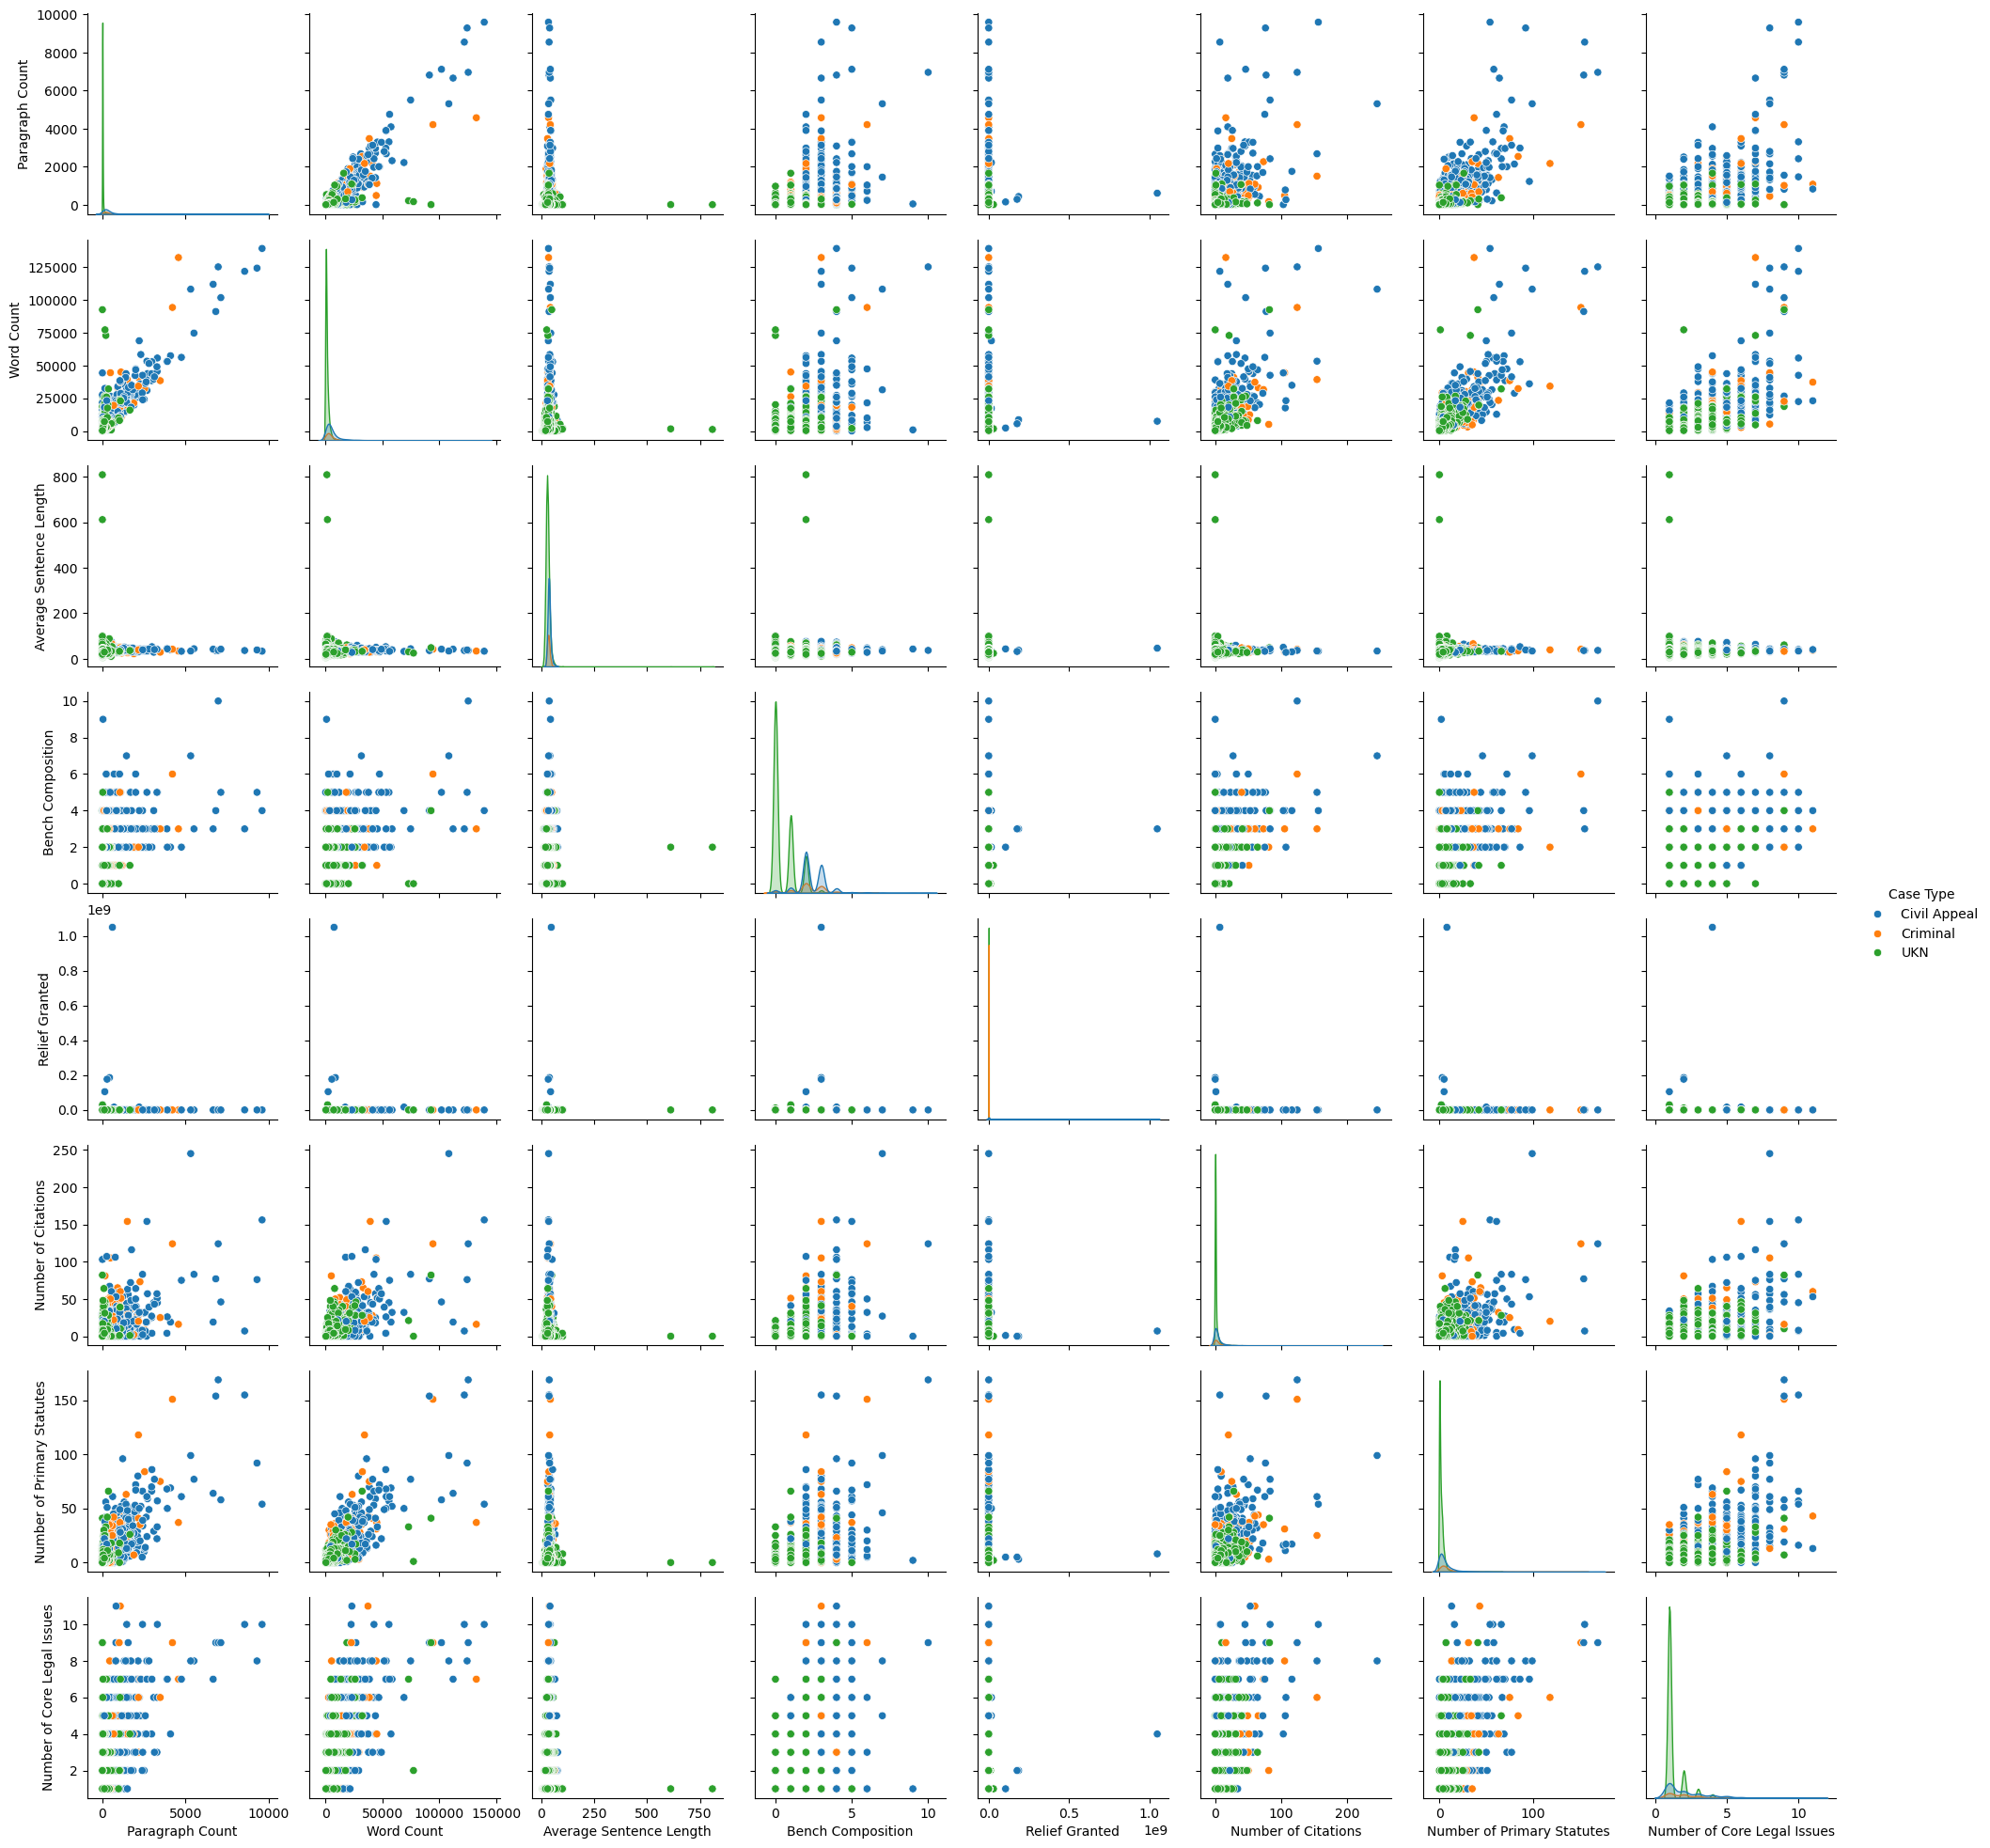

In [14]:
sns.pairplot(df,hue = "Case Type")

<h1> Hypothesis Testing </h1>

<h3> As we shall see we have gathered a sample of 10000 cases and the average number of
citations for a case was found to be around 2.5.</h3>

In [15]:
mean = numeric_df.mean()["Number of Citations"]
mean

2.4942664237487944

<h1>Now comes the bigger question. Can we infer the same about the population too?</h1>
<h2>We propose the following hypothesis: The average number of citations for a case in India is atleast 3.</h2>

<h3>The central limit theorem states that the sampling distribution of the mean will always follow a normal distribution if the sample size is sufficiently large. This condition is usually met if the sample size is n ≥ 30. We have taken a sample size of almost 10000, so the central limit
theorem holds.</h3>

<b> Null Hypothesis: The average number of citations for a case in India is 3.</b>
<b> Alternate Hypothesis: The average number of citations for a case in India is less than 3.</b>

In [16]:
# Average number of citations = 2. Is this true?


In [17]:
''' Lets take our hypothesis as follows. For a given court case, the average number of citations of an
    existing court case is atleast 3. So our null hypothesis is mean = 3(mean >=3) and our alternate
    hypothesis is mean < 3.
'''

' Lets take our hypothesis as follows. For a given court case, the average number of citations of an\n    existing court case is atleast 3. So our null hypothesis is mean = 3(mean >=3) and our alternate\n    hypothesis is mean < 3.\n'

<h2>Since our sample size is greater than or equal to 30, we shall move forward with the
Z-test. From the alternate hypothesis it is clearly seen that we have to apply a left-tailed test.</h2>

<h3> Let us take the level of significance to be 5%. We have all the required information in hand. Our task in hand is to compute the Z-statistic.</h3>

In [18]:
numeric_df.std()  #standard deviation

Paragraph Count                3.785449e+02
Word Count                     6.329200e+03
Average Sentence Length        1.343524e+01
Bench Composition              1.177935e+00
Relief Granted                 1.124955e+07
Number of Citations            7.942211e+00
Number of Primary Statutes     7.601737e+00
Number of Core Legal Issues    1.158709e+00
dtype: float64

In [19]:
standard_deviation = numeric_df.std()["Number of Citations"]
standard_deviation

7.942211182179328

<h3> Since we do not have the population standard deviation and the value of n >=30, we take the sample 
standard deviation as the population standard deviation.</h3>

In [20]:
(mean - 3)/((standard_deviation/math.sqrt(len(numeric_df))))

-6.150981940528593

<h4> Since the value of the z-statistic is less than -1.645 we reject the null hypothesis. The average number of citations for a case in India is not on average atleast 3.</h4>

In [21]:
'''We reject the null hypothesis'''

'We reject the null hypothesis'

In [22]:
'''So the average number of citations per court case is on average less than 3'''

'So the average number of citations per court case is on average less than 3'

In [23]:
numeric_df_normalized

,Paragraph Count,Word Count,Average Sentence Length,Bench Composition,Relief Granted,Number of Citations,Number of Primary Statutes,Number of Core Legal Issues
0,0.903413,0.666784,0.127215,0.731578,0.022917,0.189586,0.184149,1.212551
1,0.031654,-0.106141,0.066181,0.731578,-0.016758,-0.314052,-0.210498,0.349522
2,-0.023822,-0.243283,0.226208,0.731578,-0.016810,-0.314052,-0.078949,-0.513507
3,1.384201,0.572775,1.559270,0.731578,-0.016818,0.189586,2.552029,-0.513507
4,0.478100,0.260730,0.162197,0.731578,-0.016816,0.315496,0.447246,2.075580
...,...,...,...,...,...,...,...,...
9326,-0.367242,-0.396383,-0.887281,-0.117365,-0.016818,-0.314052,-0.210498,0.349522
9327,-0.235157,0.172251,0.071391,-0.117365,-0.016798,0.693224,0.447246,-0.513507
9328,-0.293275,-0.034094,-0.280668,-0.117365,-0.002759,-0.188142,-0.078949,-0.513507
9329,-0.364600,-0.399227,-0.855276,0.731578,-0.016818,-0.314052,-0.473596,-0.513507


<h1>Data Reduction </h1>

<h3>We have 8 dimensions containing only numeric values. Our goal is to reduce the number of dimensions as it becomes easy for data analysis and visualisation.</h3>

<h4> We use the normalized dataframe and calculate the covariance matrix.</h4>

In [24]:
covariance_matrix = numeric_df_normalized.cov()

In [25]:
covariance_matrix.head()

,Paragraph Count,Word Count,Average Sentence Length,Bench Composition,Relief Granted,Number of Citations,Number of Primary Statutes,Number of Core Legal Issues
Paragraph Count,1.000000,0.887075,0.141091,0.451559,0.015838,0.554858,0.761304,0.593841
Word Count,0.887075,1.000000,0.132680,0.434592,0.012008,0.688836,0.796501,0.666203
Average Sentence Length,0.141091,0.132680,1.000000,0.176841,0.013026,0.068038,0.126530,0.114448
Bench Composition,0.451559,0.434592,0.176841,1.000000,0.023153,0.344699,0.402971,0.454082
Relief Granted,0.015838,0.012008,0.013026,0.023153,1.000000,0.004972,0.007464,0.023355


<h3>We are going to use the Principal Component Analysis(PCA) method for dimensionality reduction. It is a type of unsupervised learning. This can be inferred as in the previous steps we calculated the covariance matrix of all the data points irrespective of their class label(case type). </h3>


<h4> We know that the eigen vectors give the direction of the distribution of the data and their corresponding eigen values tell us how much data is being distributed in that direction. We compute the eigen values and the eigen vectors in the subsequent slides.</h4>

In [ ]:
w,v = np.linalg.eig(covariance_matrix)  #eigen values and eigen vectors

In [ ]:
w  #eigen values

array([4.00935857, 0.08973123, 0.25750895, 0.48797281, 0.44891667,
       0.70313305, 1.01619192, 0.98718679])

In [ ]:
v  #eigen vectors

array([[ 0.44411169,  0.58677646, -0.46238765,  0.44469624, -0.16616914,
        -0.1290029 ,  0.04281941,  0.0285249 ],
       [ 0.4667888 , -0.78366112, -0.31092595,  0.15096706, -0.07986977,
        -0.18165659,  0.07940655,  0.05323311],
       [ 0.10076674,  0.00221115, -0.00200897, -0.07795567,  0.03039007,
        -0.31351908, -0.6843807 , -0.64510878],
       [ 0.30050338, -0.04522915,  0.03821985, -0.02621216, -0.28842767,
         0.86680879, -0.21604813, -0.15581856],
       [ 0.01168504, -0.00221738,  0.00584088, -0.00412792, -0.01581464,
        -0.04501455, -0.6732897 ,  0.73770723],
       [ 0.37914576,  0.17461358, -0.04724982, -0.83095918, -0.26851547,
        -0.1842385 ,  0.1337824 ,  0.09534558],
       [ 0.43288519,  0.04583606,  0.82811711,  0.25807093, -0.12066621,
        -0.19045264,  0.07444637,  0.04190587],
       [ 0.39133   ,  0.0832004 , -0.00364798, -0.1248168 ,  0.89161851,
         0.16871606,  0.00695313,  0.02913708]])

<h4> We sort the eigen vectors by their corresponding eigen values.</h4>

In [29]:
final = []
for i in range(len(w)):
    final.append((w[i],v[i]))


In [30]:
final

[(4.009358572496172,
  array([ 0.44411169,  0.58677646, -0.46238765,  0.44469624, -0.16616914,
         -0.1290029 ,  0.04281941,  0.0285249 ])),
 (0.08973123247466082,
  array([ 0.4667888 , -0.78366112, -0.31092595,  0.15096706, -0.07986977,
         -0.18165659,  0.07940655,  0.05323311])),
 (0.25750895285436,
  array([ 0.10076674,  0.00221115, -0.00200897, -0.07795567,  0.03039007,
         -0.31351908, -0.6843807 , -0.64510878])),
 (0.48797280921613084,
  array([ 0.30050338, -0.04522915,  0.03821985, -0.02621216, -0.28842767,
          0.86680879, -0.21604813, -0.15581856])),
 (0.44891667180687667,
  array([ 0.01168504, -0.00221738,  0.00584088, -0.00412792, -0.01581464,
         -0.04501455, -0.6732897 ,  0.73770723])),
 (0.703133047722975,
  array([ 0.37914576,  0.17461358, -0.04724982, -0.83095918, -0.26851547,
         -0.1842385 ,  0.1337824 ,  0.09534558])),
 (1.0161919200122502,
  array([ 0.43288519,  0.04583606,  0.82811711,  0.25807093, -0.12066621,
         -0.19045264,  

In [31]:
res = sorted(final,reverse=True)
res

[(4.009358572496172,
  array([ 0.44411169,  0.58677646, -0.46238765,  0.44469624, -0.16616914,
         -0.1290029 ,  0.04281941,  0.0285249 ])),
 (1.0161919200122502,
  array([ 0.43288519,  0.04583606,  0.82811711,  0.25807093, -0.12066621,
         -0.19045264,  0.07444637,  0.04190587])),
 (0.9871867934167625,
  array([ 0.39133   ,  0.0832004 , -0.00364798, -0.1248168 ,  0.89161851,
          0.16871606,  0.00695313,  0.02913708])),
 (0.703133047722975,
  array([ 0.37914576,  0.17461358, -0.04724982, -0.83095918, -0.26851547,
         -0.1842385 ,  0.1337824 ,  0.09534558])),
 (0.48797280921613084,
  array([ 0.30050338, -0.04522915,  0.03821985, -0.02621216, -0.28842767,
          0.86680879, -0.21604813, -0.15581856])),
 (0.44891667180687667,
  array([ 0.01168504, -0.00221738,  0.00584088, -0.00412792, -0.01581464,
         -0.04501455, -0.6732897 ,  0.73770723])),
 (0.25750895285436,
  array([ 0.10076674,  0.00221115, -0.00200897, -0.07795567,  0.03039007,
         -0.31351908, -0

In [32]:
total = 0
for i in range(len(res)):
    total+=res[i][0]
total

8.000000000000188

In [33]:
for i in range(len(res)):
    print(f"The percentage contribution of the {i+1}th Principal component is {(res[i][0]/total)*100}")

The percentage contribution of the 1th Principal component is 50.116982156200976
The percentage contribution of the 2th Principal component is 12.702399000152829
The percentage contribution of the 3th Principal component is 12.339834917709242
The percentage contribution of the 4th Principal component is 8.789163096536981
The percentage contribution of the 5th Principal component is 6.099660115201492
The percentage contribution of the 6th Principal component is 5.611458397585826
The percentage contribution of the 7th Principal component is 3.2188619106794243
The percentage contribution of the 8th Principal component is 1.1216404059332339


In [34]:
''' As we can see the first three Principal components make almost 75% contribution to the variance
of the sample data points .'''

' As we can see the first three Principal components make almost 75% contribution to the variance\nof the sample data points .'

<h3> As we saw from the previous slide, the eigen vectors with the three highest eigen values contribute to about 75% of the variation in the distribution of the data. So we shall transition from a basis of (x,y,z,w,u,v,a,b) to (x,y,z),i.e we shall reduce the number of dimensions from 8 to 3. This shall help us in our future analysis and in visualizing various trends in our data distributions.
</h3>

In [35]:
axes = np.array([res[0][1],res[1][1],res[2][1]])
axes.shape

(3, 8)

In [36]:
reduced_data_points = np.matmul(axes,numeric_df_normalized.transpose())

In [37]:
reduced_data_points = reduced_data_points.transpose()

In [ ]:
reduced_data_points.head()  #data reduced from having 8 numeric dimensions to 3 numeric dimensions

,0,1,2
0,1.073185,0.741434,0.406262
1,0.290760,0.313253,-0.147206
2,0.092680,0.389107,-0.205187
3,0.628140,2.239903,0.512106
4,0.656103,0.604248,0.218704


<h3> We now compute the correlation matrix of the reduced dimension dataset.</h3>

In [39]:
reduced_data_points_correlation_matrix = reduced_data_points.corr()

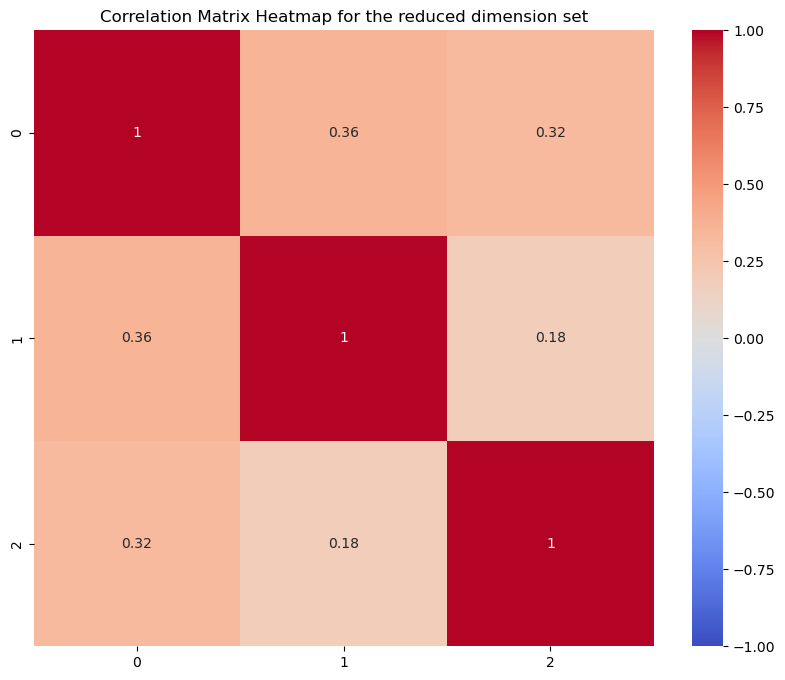

In [42]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(reduced_data_points_correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap for the reduced dimension set")
plt.show()

<h1>Next Steps we are planning to implement in our project</h1>

<h4>We can improve the scraping mechanism using more advanced tools like Selenium or Puppeteer to interact with dynamic content.</h4>
<h4>We plan to build a machine learning model that can be trained to classify legal cases by their subject,court or relevance to particular legal issues.</h4>
<h4>Build an AI tool that can predict the outcome of similar cases based on historical judgement data.
</h4>